In [1]:
import numpy as np 
from tslearn.datasets import UCR_UEA_datasets
from tslearn.svm import TimeSeriesSVC
from tslearn.preprocessing import TimeSeriesScalerMinMax

In [2]:
dataset='BasicMotions'


train_x,train_y, test_x, test_y=UCR_UEA_datasets().load_dataset(dataset)
train_x = TimeSeriesScalerMinMax().fit_transform(train_x)
test_x = TimeSeriesScalerMinMax().fit_transform(test_x)



model = TimeSeriesSVC(kernel="gak", gamma="auto", probability=True)
model.fit(train_x, train_y)
print("Correct classification rate:", model.score(test_x, test_y))


item=test_x[10].reshape(1,test_x.shape[1],test_x.shape[2])
shape=item.shape
y_target= model.predict_proba(item)
pred_y=  model.predict_proba(train_x)

Correct classification rate: 0.925


2022-10-27 10:17:48.111631: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-27 10:17:48.111650: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


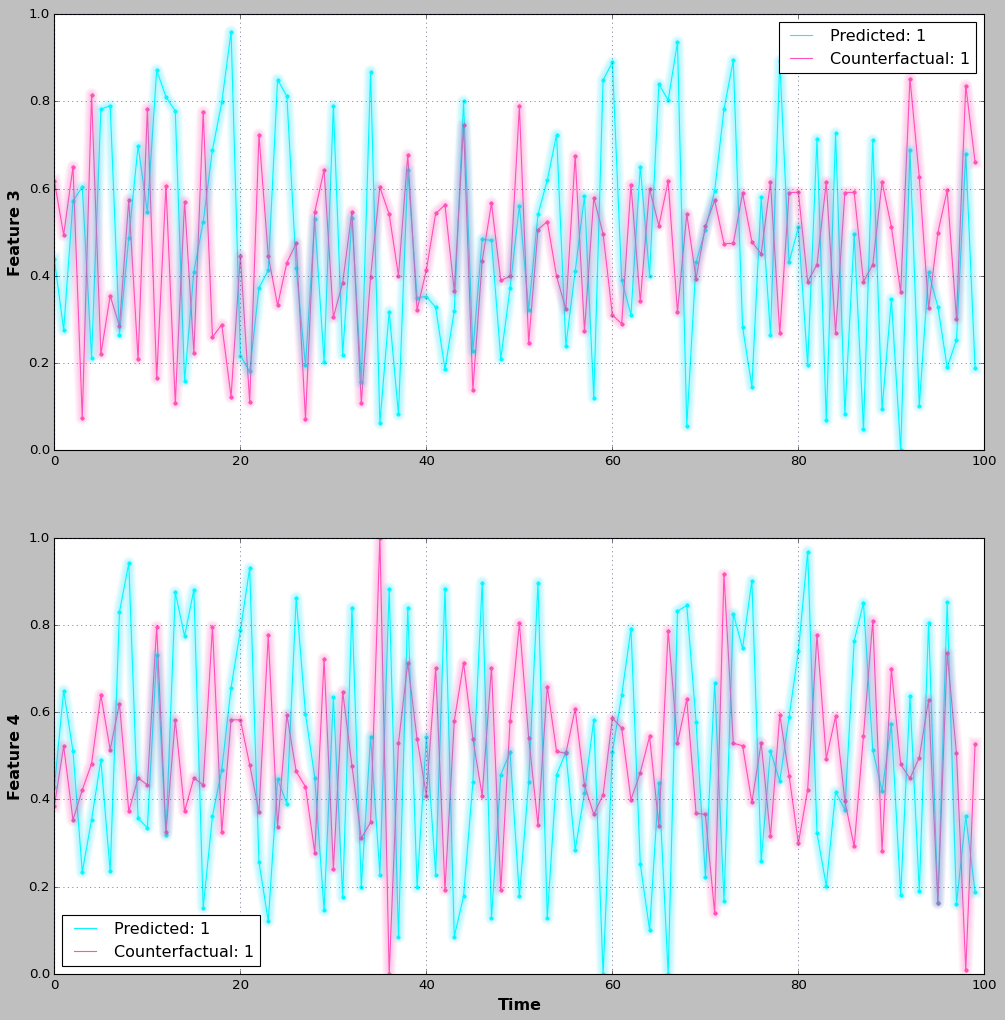

In [3]:
from TSInterpret.InterpretabilityModels.counterfactual.Ates import AtesCF

exp_model= AtesCF(model,(train_x,pred_y),mode='time', backend='SK', method= 'brute')
exp = exp_model.explain(item)
array, label=exp


%matplotlib inline
org_label=np.argmax(y_target)
cf_label=label[0]
exp=array

exp_model.plot_in_one(item,org_label,exp,cf_label,figsize=(15,15))